# Libraries and Data Load

## Load Libraries

In [1]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, average_precision_score #for 2-class model
from sklearn.preprocessing import MinMaxScaler as Scaler, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC,AdaBoostClassifier as ABC  # Random Forest package
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline


from scipy import misc, stats as st #Lots of stuff here
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
import pydot  #For model plotting
import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities

%matplotlib inline

os.chdir('D:\MI')
##############################################################################################################################

## Load Data

In [2]:
##############################################################################################################################
mydata=pd.read_sas('D:/MI/Y2019.XPT')
##############################################################################################################################

# Data Preparation

## Determine Shape

In [3]:
mydata.shape

(418268, 342)

## Determine which Age Groups to Use

In [4]:
pd.crosstab(mydata._AGE_G,mydata.CVDINFR4[mydata.CVDINFR4==1],normalize = 'columns', margins=True)
#18 to 24 almost 0% MI
#25 to 34 1.1% MI
#35 to 44 2.8% MI
#45 to 54 8.4% MI
#55 to 64 21% MI
#65 + 66% MI

CVDINFR4,1.0,All
_AGE_G,,
1.0,0.004432,0.004432
2.0,0.011120,0.011120
3.0,0.027739,0.027739
4.0,0.083792,0.083792
5.0,0.208371,0.208371
6.0,0.664547,0.664547


## Reduce Variable Set and Scope

We select variables from previous research and those of interest for investigation.

In [5]:
temp1=mydata
temp1=temp1[['CVDINFR4',
             '_AGE_G', '_IMPRACE', 'SEXVAR', 'MARITAL', 'VETERAN3', 
             'INCOME2','EDUCA', 'EMPLOY1','RENTHOM1',
             'GENHLTH', 'SMOKE100', 'USENOW3','_PA300R3', 'ALCDAY5',
             'TOLDHI2', '_RFHYPE5', '_RFBMI5', 
             'DIABETE4', 'PHYSHLTH', 'MENTHLTH',  'ADDEPEV3','CVDSTRK3', 'ASTHMA3', 
             'CHCSCNCR','CHCOCNCR', 'CHCCOPD2','CHCKDNY2','HAVARTH4',
             'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1',
             '_STATE', '_METSTAT', '_LLCPWT', '_STSTR', '_PSU']]

pd.crosstab(temp1._AGE_G, temp1.CVDINFR4, normalize='columns')


CVDINFR4,1.0,2.0,7.0,9.0
_AGE_G,,,,
1.0,0.004432,0.063629,0.038933,0.010256
2.0,0.011120,0.111076,0.065617,0.030769
3.0,0.027739,0.124147,0.086177,0.025641
4.0,0.083792,0.150002,0.110674,0.307692
5.0,0.208371,0.200408,0.202975,0.179487
6.0,0.664547,0.350737,0.495626,0.446154


In [6]:
temp1.shape

(418268, 38)

##  We Restrict Analyses to Age Cat 3 through 6

These groups account for 98%+ of the observations of MI.

In [7]:
temp1=temp1.loc[temp1['_AGE_G']>=3] #filter excludes 18 to 34 year olds, less than 1.2% of MI in dataset

## Handle Missing

Rows missing 20% or more are eliminated (7 or more variables, 18 observations eliminated).  
Columns missing 20% or more observations are eliminated (69853 or more observations, 0 eliminated).

### Columns

We verify that all selected columns have LT 20% missing.

In [8]:
a=temp1.isnull().sum() #count the nulls by column
print(a.sort_values(ascending=False).head(10))

ALCDAY5     14702
USENOW3     13500
SMOKE100    12907
TOLDHI2     11857
_METSTAT     6589
INCOME2      5431
EMPLOY1      2233
VETERAN3     1126
MARITAL        45
PHYSHLTH       28
dtype: int64


### Rows

We investigate the same by row

In [9]:
pd.set_option('display.max_rows', 500)
b=temp1.isnull().sum(axis=1) #count the nulls by column
b=b.sort_values(ascending=False)
print(b.head(90))

60298     26
60190     26
59974     26
58979     26
58498     19
339417    19
58968     19
633       18
42        12
85152     10
404345     9
60400      9
326094     8
2250       8
219506     8
335930     8
410564     8
3175       8
342909     8
160591     7
300321     7
357526     7
296332     7
195595     7
82854      7
94520      7
348283     7
74516      7
410352     7
322856     7
296043     7
250712     7
306602     7
122706     7
122768     7
133751     7
70122      7
133558     7
69255      7
415879     7
50756      7
413903     7
34187      7
403666     7
304831     7
410862     7
410155     7
394867     7
412595     7
247849     7
229638     7
297400     7
127234     7
207558     7
17727      7
125763     7
363696     7
127674     7
276763     7
378311     7
115376     7
377657     7
45726      7
376492     7
88611      7
213536     7
346943     7
8811       7
401521     7
83704      7
23881      7
217160     7
62065      7
344944     7
124964     7
91460      7
91598      7

In [10]:
todrop=b.head(85).index
todrop

Int64Index([ 60298,  60190,  59974,  58979,  58498, 339417,  58968,    633,
                42,  85152, 404345,  60400, 326094,   2250, 219506, 335930,
            410564,   3175, 342909, 160591, 300321, 357526, 296332, 195595,
             82854,  94520, 348283,  74516, 410352, 322856, 296043, 250712,
            306602, 122706, 122768, 133751,  70122, 133558,  69255, 415879,
             50756, 413903,  34187, 403666, 304831, 410862, 410155, 394867,
            412595, 247849, 229638, 297400, 127234, 207558,  17727, 125763,
            363696, 127674, 276763, 378311, 115376, 377657,  45726, 376492,
             88611, 213536, 346943,   8811, 401521,  83704,  23881, 217160,
             62065, 344944, 124964,  91460,  91598, 293327, 148031, 358906,
             75505, 413175, 320726, 326736,  52175],
           dtype='int64')

## Drop the Rows and Plot Missing

<AxesSubplot:>

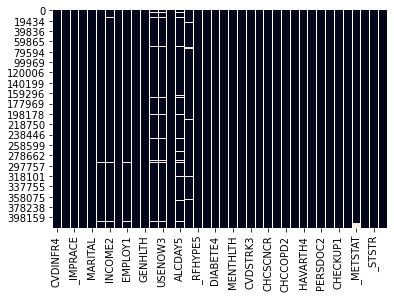

In [11]:
temp1 = temp1.drop(todrop)                    
sns.heatmap(temp1.isnull(), cbar=False)

## Impute Median
Given the small number of missing values remaining, impute median.

In [12]:
num=temp1.isna().sum().sum()
den=temp1.shape[0]*temp1.shape[1]
print('missing:', num/den)
temp1=temp1.fillna(temp1.median())
print(temp1.shape)

missing: 0.005116933942526948
(349176, 38)


## Rename Columns

In [13]:
mydict={'CVDINFR4':'MI','_AGE_G':'Age', '_IMPRACE':'Race', 'SEXVAR':'Male', 'MARITAL':'Unmarried', 'VETERAN3':'Veteran', 
             'INCOME2':'LowIncome','EDUCA':'LowEducation', 'EMPLOY1':'Unemployed', 'RENTHOM1':'RentHome',
             'GENHLTH':'PoorHealth', 'SMOKE100':'Smoker','USENOW3':'ChewSnuff',
             '_PA300R3':'NoExercise', 'ALCDAY5':'PercentDrink',
            'TOLDHI2':'HighCholesterol', '_RFHYPE5':'HighBP', '_RFBMI5':'HighBMI', 
             'DIABETE4':'Diabetes', 'PHYSHLTH':'PhysicalHealth','MENTHLTH':'MentalHealth',
             'ADDEPEV3':'Depression','CVDSTRK3':'Stroke', 
            'ASTHMA3':'Asthma','CHCSCNCR':'SkinCancer', 'CHCOCNCR':'Cancer', 
            'CHCCOPD2':'COPD','CHCKDNY2':'Kidney','HAVARTH4':'Arthritis', 
             'HLTHPLN1':'NoHealthPlan', 'PERSDOC2':'NoDoctor', 'MEDCOST':'Cost', 'CHECKUP1':'NoCheckup',
             '_STATE':'State', '_LLCPWT':'Weights', '_METSTAT': 'Metropolitan','_STSTR':'Stratum', '_PSU':'PSU'}
temp1=temp1.rename(columns=dict(mydict))

# Recodes

## MI, 1=YES

Has a doctor, nurse, or other health professional ever told you that you had any of the following? Heart Attack
1=Yes, 2=No, 7=Don't Know, 9=Refused

In [14]:
print(pd.value_counts(temp1.MI, normalize='columns'))
a_dict = {2:0, 7:0, 9:0}  #Modal response impute
temp1['MI']=temp1['MI'].replace(dict(a_dict))
print(pd.value_counts(temp1.MI, normalize='columns'))

2.0    0.924918
1.0    0.068693
7.0    0.005860
9.0    0.000530
Name: MI, dtype: float64
0.0    0.931307
1.0    0.068693
Name: MI, dtype: float64


## Age Group 35-44, 45-54, 55-64, and 65+

Age Group 35-44 is the referent group.

In [15]:
print(pd.value_counts(temp1.Age, normalize='columns'))
b0_dict={3:0, 4:0, 5:0, 6:1} #Age 65+
b1_dict={3:0,4:0, 5:1, 6:0} #Age 55-64
b2_dict={3:0,4:1, 5:0, 6:0} #Age 45-54

temp1['Age65']=temp1['Age'].replace(dict(b0_dict))
temp1['Age55_64']=temp1['Age'].replace(dict(b1_dict))
temp1['Age45_54']=temp1['Age'].replace(dict(b2_dict))
print(pd.value_counts(temp1.Age65, normalize='columns'))
print(pd.value_counts(temp1.Age55_64, normalize='columns'))
print(pd.value_counts(temp1.Age45_54, normalize='columns'))
temp1=temp1.drop(columns=['Age'])

6.0    0.442983
5.0    0.240563
4.0    0.174840
3.0    0.141613
Name: Age, dtype: float64
0.0    0.557017
1.0    0.442983
Name: Age65, dtype: float64
0.0    0.759437
1.0    0.240563
Name: Age55_64, dtype: float64
0.0    0.82516
1.0    0.17484
Name: Age45_54, dtype: float64


## Race Recode:  Black, Hispanic, Other with 1=Minority
Imputed race/ethnicity value
1=White NH, 2=Black NH, 3=Asian NH, 4=AI/NA NH, 5=Hispanic, 6=Other NH
White NH is the referent group.

In [16]:
pd.crosstab(temp1.Race, temp1.MI, normalize='index') 

MI,0.0,1.0
Race,,
1.0,0.929955,0.070045
2.0,0.935708,0.064292
3.0,0.966551,0.033449
4.0,0.889398,0.110602
5.0,0.949963,0.050037
6.0,0.912424,0.087576


In [17]:
print(pd.value_counts(temp1.Race, normalize='columns'))
c_dict={2:1, 1:0, 3:0, 4:0, 5:0, 6:0}
d_dict={5:1, 1:0, 2:0, 3:0, 4:0, 6:0}
e_dict={1:0, 2:0, 3:1, 4:1, 5:0, 6:1}
temp1['Black']=temp1['Race'].replace(dict(c_dict))
temp1['Hispanic']=temp1['Race'].replace(dict(d_dict))
temp1['Other']=temp1['Race'].replace(dict(e_dict))
print(pd.value_counts(temp1.Black, normalize='columns'))
print(pd.value_counts(temp1.Hispanic, normalize='columns'))
print(pd.value_counts(temp1.Other, normalize='columns'))
temp1=temp1.drop(columns=['Race'])

1.0    0.789192
2.0    0.073811
5.0    0.073204
6.0    0.030772
3.0    0.017381
4.0    0.015640
Name: Race, dtype: float64
0.0    0.926189
1.0    0.073811
Name: Black, dtype: float64
0.0    0.926796
1.0    0.073204
Name: Hispanic, dtype: float64
0.0    0.936207
1.0    0.063793
Name: Other, dtype: float64


## Gender, 1=Male
Calculated sex variable

In [18]:
pd.crosstab(temp1.Male, temp1.MI, normalize='index')

MI,0.0,1.0
Male,,
1.0,0.907503,0.092497
2.0,0.950059,0.049941


In [19]:
print(pd.value_counts(temp1.Male, normalize='columns'))
f_dict={2:0, 1:1}
temp1['Male']=temp1['Male'].replace(dict(f_dict))
print(pd.value_counts(temp1.Male, normalize='columns'))

2.0    0.559351
1.0    0.440649
Name: Male, dtype: float64
0.0    0.559351
1.0    0.440649
Name: Male, dtype: float64


## Unmarried

1=Married, 2=Divorced, 3=Widowed, 4=Separated, 5=Never Married, 6=Member of Unmarried Couple, 9=Refused

We define PreviousMarriage as divorced, widowed, or separated.

We then defined NeverMarried.



In [20]:
pd.crosstab(temp1.Unmarried, temp1.MI, normalize='index')

MI,0.0,1.0
Unmarried,,
1.0,0.942805,0.057195
2.0,0.917598,0.082402
3.0,0.887866,0.112134
4.0,0.914193,0.085807
5.0,0.949591,0.050409
6.0,0.951949,0.048051
9.0,0.951811,0.048189


In [21]:
print(pd.value_counts(temp1.Unmarried, normalize='columns'))
g0_dict={1:0,2:1, 3:1, 4:1, 5:0, 6:0, 9:0} #divorced / widowed / separated
g1_dict={1:0,2:0, 3:0, 4:0, 5:1, 6:0, 9:0} #never married

temp1['PreviousMarriage']=temp1['Unmarried'].replace(dict(g0_dict))
temp1['NeverMarried']=temp1['Unmarried'].replace(dict(g1_dict))
temp1=temp1.drop(columns=['Unmarried'])

print(pd.value_counts(temp1.PreviousMarriage, normalize='columns'))
print(pd.value_counts(temp1.NeverMarried, normalize='columns'))

1.0    0.552747
2.0    0.154068
3.0    0.144683
5.0    0.095333
6.0    0.023661
4.0    0.021127
9.0    0.008380
Name: Unmarried, dtype: float64
0.0    0.680121
1.0    0.319879
Name: PreviousMarriage, dtype: float64
0.0    0.904667
1.0    0.095333
Name: NeverMarried, dtype: float64


## Veteran, 1=Veteran

Have you ever served on active duty in the United States Armed Forces, either in the regular military or the National Guard or military reserve unit?  

1=Yes, 2=No, 7/9=DK/Refused

In [22]:
pd.crosstab(temp1.Veteran, temp1.MI, normalize='index')

MI,0.0,1.0
Veteran,,
1.0,0.872503,0.127497
2.0,0.941017,0.058983
7.0,0.832061,0.167939
9.0,0.943005,0.056995


In [23]:
print(pd.value_counts(temp1.Veteran, normalize='columns'))
h0_dict={1:1, 2:0, 7:0, 9:0} #VetYes
temp1['Veteran']=temp1['Veteran'].replace(dict(h0_dict))
print(pd.value_counts(temp1.Veteran, normalize='columns'))

2.0    0.856216
1.0    0.141198
9.0    0.002211
7.0    0.000375
Name: Veteran, dtype: float64
0.0    0.858802
1.0    0.141198
Name: Veteran, dtype: float64


## Poor Income

1=<10K, 2=<15K, 3=<20K, 4=<25K, 5=<35K,6=<50K,7=<75K,8=>=75K, 77/99=DK, Refused

We use below 25K, below 75K, DK/Refused, with referent group of 75K+.

In [24]:
pd.crosstab(temp1.LowIncome,temp1.MI, normalize='index')

MI,0.0,1.0
LowIncome,,
1.0,0.888238,0.111762
2.0,0.866025,0.133975
3.0,0.886934,0.113066
4.0,0.899558,0.100442
5.0,0.913157,0.086843
6.0,0.927652,0.072348
7.0,0.944082,0.055918
8.0,0.965085,0.034915
77.0,0.907951,0.092049


In [25]:
print(pd.value_counts(temp1.LowIncome, normalize='columns'))
i0_dict={1:1, 2:1, 3:1, 4:1, 5:0, 6:0, 7:0, 8:0, 77:0,99:0}
i1_dict={1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1, 8:0, 77:0,99:0}
i2_dict={1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 77:1,99:1}
temp1['LT25K']=temp1['LowIncome'].replace(dict(i0_dict))
temp1['LT50K']=temp1['LowIncome'].replace(dict(i1_dict))
temp1['Income_DKR']=temp1['LowIncome'].replace(dict(i2_dict))
print(pd.value_counts(temp1.LT25K, normalize='columns'))
print(pd.value_counts(temp1.LT50K, normalize='columns'))
print(pd.value_counts(temp1.Income_DKR, normalize='columns'))
temp1=temp1.drop(columns=['LowIncome'])

8.0     0.289630
7.0     0.144174
6.0     0.109214
99.0    0.106820
5.0     0.081125
4.0     0.069942
77.0    0.067857
3.0     0.055193
2.0     0.039888
1.0     0.036157
Name: LowIncome, dtype: float64
0.0    0.798821
1.0    0.201179
Name: LT25K, dtype: float64
0.0    0.665487
1.0    0.334513
Name: LT50K, dtype: float64
0.0    0.825323
1.0    0.174677
Name: Income_DKR, dtype: float64


## Education Recode: Below HS, HS, Post-HS but Not College Grad

1=Never Attended, 2=Grades 1 through 8, 3=Grades 9-11, 4=Grade 12 / GED, 5=College 1 to 3 years, 6=College 4 or more years, 9=Refused

In [26]:
pd.crosstab(temp1.LowEducation,temp1.MI, normalize='index')

MI,0.0,1.0
LowEducation,,
1.0,0.906191,0.093809
2.0,0.883726,0.116274
3.0,0.877313,0.122687
4.0,0.915391,0.084609
5.0,0.927750,0.072250
6.0,0.953934,0.046066
9.0,0.939911,0.060089


In [27]:
print(pd.value_counts(temp1.LowEducation, normalize='columns'))
j_dict={1:1, 2:1, 3:1, 4:0, 5:0, 6:0, 9:0} #add 9 to referent group (very small)
k_dict={1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 9:0}
l_dict={1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 9:0} #not a college grad but post-HS
temp1['PreHS']=temp1['LowEducation'].replace(dict(j_dict))
temp1['HS']=temp1['LowEducation'].replace(dict(k_dict))
temp1['PostHS']=temp1['LowEducation'].replace(dict(l_dict))
print(pd.value_counts(temp1.PreHS, normalize='columns'))
print(pd.value_counts(temp1.HS, normalize='columns'))
print(pd.value_counts(temp1.PostHS, normalize='columns'))
temp1=temp1.drop(columns=['LowEducation'])

6.0    0.389056
5.0    0.272673
4.0    0.261106
3.0    0.045962
2.0    0.025148
9.0    0.004528
1.0    0.001526
Name: LowEducation, dtype: float64
0.0    0.927363
1.0    0.072637
Name: PreHS, dtype: float64
0.0    0.738894
1.0    0.261106
Name: HS, dtype: float64
0.0    0.727327
1.0    0.272673
Name: PostHS, dtype: float64


## Not Employed

1=Employed for Wages, 2=Self-Employed, 3=Out of work 1+, 4=Out of work <1, 5=Homemaker, 6=Student, 7=Retired, 8=Unable to Work, 9=Refused.

RetiredUnable=7, 8

OutofWork=3,4

OtherNotWorking=5,6,9

In [28]:
pd.crosstab(temp1.Unemployed,temp1.MI, normalize='index')

MI,0.0,1.0
Unemployed,,
1.0,0.973462,0.026538
2.0,0.957115,0.042885
3.0,0.924810,0.075190
4.0,0.953511,0.046489
5.0,0.955229,0.044771
6.0,0.977663,0.022337
7.0,0.897222,0.102778
8.0,0.847608,0.152392
9.0,0.948222,0.051778


In [29]:
print(pd.value_counts(temp1.Unemployed, normalize='columns'))
m0_dict={1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:0} # RetiredUnable...  refused added to referent group (very small)
m1_dict={1:0, 2:0, 3:1, 4:1, 5:0, 6:0, 7:0, 8:0, 9:0} # OutofWork
m2_dict={1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:0, 8:0, 9:0} # Other not Working
temp1['RetiredUnable']=temp1['Unemployed'].replace(dict(m0_dict))
temp1['OutofWork']=temp1['Unemployed'].replace(dict(m1_dict))
temp1['OtherNotWorking']=temp1['Unemployed'].replace(dict(m2_dict))
print(pd.value_counts(temp1.RetiredUnable, normalize='columns'))
print(pd.value_counts(temp1.OutofWork, normalize='columns'))
print(pd.value_counts(temp1.OtherNotWorking, normalize='columns'))
temp1=temp1.drop(columns=['Unemployed'])

7.0    0.368593
1.0    0.357525
2.0    0.094027
8.0    0.080753
5.0    0.055075
3.0    0.017673
4.0    0.014723
9.0    0.008297
6.0    0.003334
Name: Unemployed, dtype: float64
0.0    0.550654
1.0    0.449346
Name: RetiredUnable, dtype: float64
0.0    0.967604
1.0    0.032396
Name: OutofWork, dtype: float64
0.0    0.941591
1.0    0.058409
Name: OtherNotWorking, dtype: float64


## Rent Home

1=Own, 2=Rent, 3=Other, 7/9=DK/R

In [30]:
pd.crosstab(temp1.RentHome,temp1.MI, normalize='index')

MI,0.0,1.0
RentHome,,
1.0,0.935993,0.064007
2.0,0.916020,0.083980
3.0,0.903329,0.096671
7.0,0.925852,0.074148
9.0,0.938022,0.061978


In [31]:
print(pd.value_counts(temp1.RentHome, normalize='columns'))
m2_dict={2:1, 1:0, 3:0, 7:0, 9:0}
temp1['RentHome']=temp1['RentHome'].replace(dict(m2_dict))
print(pd.value_counts(temp1.RentHome, normalize='columns'))

1.0    0.777327
2.0    0.183503
3.0    0.031225
9.0    0.006515
7.0    0.001429
Name: RentHome, dtype: float64
0.0    0.816497
1.0    0.183503
Name: RentHome, dtype: float64


## Poor Health

1=Excellent, 2=Very Good, 3=Good, 4=Fair, 5=Poor, 7/9=DK, Refused


In [32]:
print(pd.value_counts(temp1.PoorHealth, normalize='columns'))
#7 and 9 are small, modal imputation
m2a_dict={7:3, 9:3}
temp1['PoorHealth']=temp1['PoorHealth'].replace(dict(m2a_dict))
print(pd.value_counts(temp1.PoorHealth, normalize='columns'))

3.0    0.321102
2.0    0.317877
4.0    0.152814
1.0    0.145371
5.0    0.060207
7.0    0.001902
9.0    0.000727
Name: PoorHealth, dtype: float64
3.0    0.323731
2.0    0.317877
4.0    0.152814
1.0    0.145371
5.0    0.060207
Name: PoorHealth, dtype: float64


In [33]:
pd.crosstab(temp1.PoorHealth,temp1.MI, normalize='index')

MI,0.0,1.0
PoorHealth,,
1.0,0.982447,0.017553
2.0,0.966773,0.033227
3.0,0.932103,0.067897
4.0,0.868101,0.131899
5.0,0.776721,0.223279


In [34]:
print(pd.value_counts(temp1.PoorHealth, normalize='columns'))
n0_dict={1:0, 2:0, 3:0, 4:0, 5:1, 7:0, 9:0} #poor health
n1_dict={1:0, 2:0, 3:0, 4:1, 5:0, 7:0, 9:0} #fair health
n2_dict={1:0, 2:0, 3:1, 4:0, 5:0, 7:0, 9:0} #good health

temp1['FairHealth']=temp1['PoorHealth'].replace(dict(n1_dict))
temp1['GoodHealth']=temp1['PoorHealth'].replace(dict(n2_dict))
temp1['PoorHealth']=temp1['PoorHealth'].replace(dict(n0_dict))

print(pd.value_counts(temp1.PoorHealth, normalize='columns'))

3.0    0.323731
2.0    0.317877
4.0    0.152814
1.0    0.145371
5.0    0.060207
Name: PoorHealth, dtype: float64
0.0    0.939793
1.0    0.060207
Name: PoorHealth, dtype: float64


## Smoker

Have you smoked 100 cigarettes in your life?  1=Yes, 2=No, 7/9=DK/Refused

In [35]:
pd.crosstab(temp1.Smoker,temp1.MI, normalize='index')

MI,0.0,1.0
Smoker,,
1.0,0.903343,0.096657
2.0,0.952378,0.047622
7.0,0.932322,0.067678
9.0,0.948919,0.051081


In [36]:
print(pd.value_counts(temp1.Smoker, normalize='columns'))
temp1['Smoker']=temp1['Smoker'].replace(dict(a_dict))
print(pd.value_counts(temp1.Smoker, normalize='columns'))

2.0    0.566021
1.0    0.427612
7.0    0.004909
9.0    0.001458
Name: Smoker, dtype: float64
0.0    0.572388
1.0    0.427612
Name: Smoker, dtype: float64


## Chew / Snuff

Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?
1=Every day, 2=Some days, 3=Not at all, 7/9=DK/Refused

In [37]:
pd.crosstab(temp1.ChewSnuff,temp1.MI, normalize='index')

MI,0.0,1.0
ChewSnuff,,
1.0,0.918790,0.081210
2.0,0.922188,0.077812
3.0,0.931641,0.068359
7.0,0.880597,0.119403
9.0,0.948276,0.051724


In [38]:
print(pd.value_counts(temp1.ChewSnuff, normalize='columns'))
n2_dict={1:1, 2:1, 3:0, 7:0, 9:0}
temp1['ChewSnuff']=temp1['ChewSnuff'].replace(dict(n2_dict))
print(pd.value_counts(temp1.ChewSnuff, normalize='columns'))

3.0    0.969150
1.0    0.017985
2.0    0.011152
9.0    0.001329
7.0    0.000384
Name: ChewSnuff, dtype: float64
0.0    0.970863
1.0    0.029137
Name: ChewSnuff, dtype: float64


## Poor Exercise

1=301+ minutes (or vigorous equivalent) of physical activity, 2=1-300 minutes, 3=0 minutes, 9=DK/Refused


In [39]:
pd.crosstab(temp1.NoExercise,temp1.MI, normalize='index')

MI,0.0,1.0
NoExercise,,
1.0,0.938377,0.061623
2.0,0.950721,0.049279
3.0,0.903482,0.096518
9.0,0.931500,0.068500


In [40]:
print(pd.value_counts(temp1.NoExercise, normalize='columns'))
o_dict={1:0,2:0,3:1, 9:0} #modal imputation
temp1['NoExercise']=temp1['NoExercise'].replace(dict(o_dict))
print(pd.value_counts(temp1.NoExercise, normalize='columns'))

1.0    0.320300
2.0    0.282270
3.0    0.279154
9.0    0.118276
Name: NoExercise, dtype: float64
0.0    0.720846
1.0    0.279154
Name: NoExercise, dtype: float64


## Proportion of Days Drink

101-107:  days per week 

201-230:  days in past 30 days

777:  don't know/not sure

888:  no days

999:  refused

<AxesSubplot:xlabel='PercentDrink', ylabel='Count'>

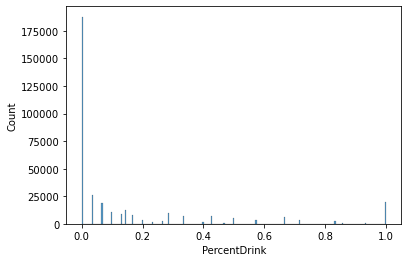

In [41]:
#print(temp1['PercentDrink'].value_counts())
def my_recode(v):
    if v==888:
        return(0)
    elif v>0 and v<=107:
        return (v-100)/7
    elif v>107 and v<=230:
        return (v-200)/30
    else:
        return 0
temp1['PercentDrink']= temp1['PercentDrink'].apply(my_recode)
mysc=Scaler()
temp1['PercentDrink']=mysc.fit_transform(temp1[['PercentDrink']])
sns.histplot(data=temp1, x="PercentDrink")

## Proportion of Drinks Squared

In [42]:
temp1['PercentDrink_2']=np.square(temp1['PercentDrink'])

## High Cholesterol

1=Yes, 2=No, 7/9=DK/Refused

In [43]:
pd.crosstab(temp1.HighCholesterol,temp1.MI, normalize='index')

MI,0.0,1.0
HighCholesterol,,
1.0,0.891152,0.108848
2.0,0.958808,0.041192
7.0,0.901498,0.098502
9.0,0.960526,0.039474


In [44]:
print(pd.value_counts(temp1.HighCholesterol, normalize='columns'))
temp1['HighCholesterol']=temp1['HighCholesterol'].replace(dict(a_dict))
print(pd.value_counts(temp1.HighCholesterol, normalize='columns'))

2.0    0.590822
1.0    0.397768
7.0    0.010321
9.0    0.001088
Name: HighCholesterol, dtype: float64
0.0    0.602232
1.0    0.397768
Name: HighCholesterol, dtype: float64


## High BP

1=No, 2=Yes, 9=DK/Not Sure/Refused/Missing

In [45]:
print(pd.value_counts(temp1.HighBP, normalize='columns'))
p_dict={1:0, 2:1, 9:0}  #2 = YES
temp1['HighBP']=temp1['HighBP'].replace(dict(p_dict))
print(pd.value_counts(temp1.HighBP, normalize='columns'))

1.0    0.532789
2.0    0.463400
9.0    0.003812
Name: HighBP, dtype: float64
0.0    0.5366
1.0    0.4634
Name: HighBP, dtype: float64


## High BMI

1=No, 2=Yes, 9=DK/R/M

In [46]:
print(pd.value_counts(temp1.HighBMI, normalize='columns'))
temp1['HighBMI']=temp1['HighBMI'].replace(dict(p_dict))
print(pd.value_counts(temp1.HighBMI, normalize='columns'))

2.0    0.642962
1.0    0.273309
9.0    0.083729
Name: HighBMI, dtype: float64
1.0    0.642962
0.0    0.357038
Name: HighBMI, dtype: float64


## Diabetes

1=Yes, 2=During Pregnancy, 3=No, 4=No-prediabetes, 7=DK, 9=Refused

In [47]:
print(pd.value_counts(temp1.Diabetes, normalize='columns'))
q0_dict={1:1, 2:0, 3:0, 4:0, 7:0, 9:0} #diabetes
q1_dict={1:0, 2:0, 3:0, 4:1, 7:0, 9:0} #pre-diabetic
temp1['Diabetic']=temp1['Diabetes'].replace(dict(q0_dict))
temp1['Prediabetic']=temp1['Diabetes'].replace(dict(q1_dict))
temp1=temp1.drop(columns=['Diabetes'])
print(pd.value_counts(temp1.Diabetic, normalize='columns'))
print(pd.value_counts(temp1.Prediabetic, normalize='columns'))

3.0    0.803884
1.0    0.160965
4.0    0.024609
2.0    0.008509
7.0    0.001412
9.0    0.000621
Name: Diabetes, dtype: float64
0.0    0.839035
1.0    0.160965
Name: Diabetic, dtype: float64
0.0    0.975391
1.0    0.024609
Name: Prediabetic, dtype: float64


## Days Poor Physical Health

1-30=Number of Days, 88=0, 77=DK, 99=Refused

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Count'>

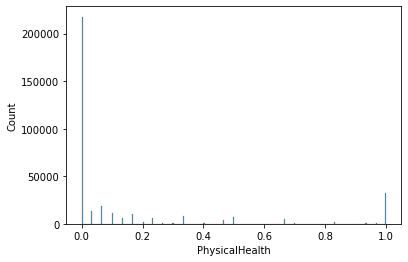

In [48]:
def my_recode2(v):
    if v>30:
        return(0)
    else:
        return(v)
    
    
temp1['PhysicalHealth']= temp1['PhysicalHealth'].apply(my_recode2)
temp1['PhysicalHealth']=mysc.fit_transform(temp1[['PhysicalHealth']])
sns.histplot(data=temp1, x="PhysicalHealth")

## Mental Health

1-30=Number of days, 88=None, 77/99=DK/Refused

<AxesSubplot:xlabel='MentalHealth', ylabel='Count'>

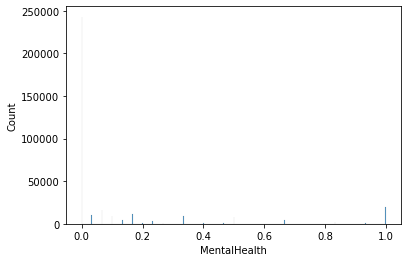

In [49]:
temp1['MentalHealth']= temp1['MentalHealth'].apply(my_recode2)
temp1['MentalHealth']=mysc.fit_transform(temp1[['MentalHealth']])
sns.histplot(data=temp1, x="MentalHealth")

## Depression

1=Yes, 2=No, 7/9=DK/R

In [50]:
print(pd.value_counts(temp1.Depression, normalize='columns'))
temp1['Depression']=temp1['Depression'].replace(dict(a_dict))
print(pd.value_counts(temp1.Depression, normalize='columns'))

2.0    0.812098
1.0    0.182704
7.0    0.003946
9.0    0.001252
Name: Depression, dtype: float64
0.0    0.817296
1.0    0.182704
Name: Depression, dtype: float64


## Stroke

1=Yes, 2=No, 7/9=DK/R

In [51]:
print(pd.value_counts(temp1.Stroke, normalize='columns'))
temp1['Stroke']=temp1['Stroke'].replace(dict(a_dict))
print(pd.value_counts(temp1.Stroke, normalize='columns'))

2.0    0.944040
1.0    0.052524
7.0    0.002941
9.0    0.000495
Name: Stroke, dtype: float64
0.0    0.947476
1.0    0.052524
Name: Stroke, dtype: float64


## Asthma

1=Yes, 2=No, 7/9=DK/R


In [52]:
print(pd.value_counts(temp1.Asthma, normalize='columns'))
temp1['Asthma']=temp1['Asthma'].replace(dict(a_dict))
print(pd.value_counts(temp1.Asthma, normalize='columns'))

2.0    0.862765
1.0    0.133700
7.0    0.003047
9.0    0.000487
Name: Asthma, dtype: float64
0.0    0.8663
1.0    0.1337
Name: Asthma, dtype: float64


## Skin Cancer

1=Yes, 2=No, 7/9=DK/R

In [53]:
print(pd.value_counts(temp1.SkinCancer, normalize='columns'))
temp1['SkinCancer']=temp1['SkinCancer'].replace(dict(a_dict))
print(pd.value_counts(temp1.SkinCancer, normalize='columns'))

2.0    0.877998
1.0    0.118384
7.0    0.003104
9.0    0.000513
Name: SkinCancer, dtype: float64
0.0    0.881616
1.0    0.118384
Name: SkinCancer, dtype: float64


## Cancer (Other than Skin)

1=Yes, 2=No, 7/9=DK/R


In [54]:
print(pd.value_counts(temp1.Cancer, normalize='columns'))
temp1['Cancer']=temp1['Cancer'].replace(dict(a_dict))
print(pd.value_counts(temp1.Cancer, normalize='columns'))

2.0    0.877351
1.0    0.119570
7.0    0.002280
9.0    0.000799
Name: Cancer, dtype: float64
0.0    0.88043
1.0    0.11957
Name: Cancer, dtype: float64


## COPD

1=Yes, 2=No, 7/9=DK/R

In [55]:
print(pd.value_counts(temp1.COPD, normalize='columns'))
temp1['COPD']=temp1['COPD'].replace(dict(a_dict))
print(pd.value_counts(temp1.COPD, normalize='columns'))

2.0    0.897032
1.0    0.097183
7.0    0.005201
9.0    0.000584
Name: COPD, dtype: float64
0.0    0.902817
1.0    0.097183
Name: COPD, dtype: float64


## Kidney Disease

1=Yes, 2=No, 7/9=DK/R

In [56]:
print(pd.value_counts(temp1.Kidney, normalize='columns'))
temp1['Kidney']=temp1['Kidney'].replace(dict(a_dict))
print(pd.value_counts(temp1.Kidney, normalize='columns'))

2.0    0.950850
1.0    0.044894
7.0    0.003697
9.0    0.000558
Name: Kidney, dtype: float64
0.0    0.955106
1.0    0.044894
Name: Kidney, dtype: float64


## Arthritis

1=Yes, 2=No, 7/9=DK/R

In [57]:
print(pd.value_counts(temp1.Arthritis, normalize='columns'))
temp1['Arthritis']=temp1['Arthritis'].replace(dict(a_dict))
print(pd.value_counts(temp1.Arthritis, normalize='columns'))

2.0    0.605955
1.0    0.387613
7.0    0.005751
9.0    0.000682
Name: Arthritis, dtype: float64
0.0    0.612387
1.0    0.387613
Name: Arthritis, dtype: float64


## No Health Plan         

1=Yes, 2=No, 7/9=DK/R

In [58]:
print(pd.value_counts(temp1.NoHealthPlan, normalize='columns'))
s_dict={1:0, 2:1, 7:0, 9:0} #2 is the assumed bad value
temp1['NoHealthPlan']=temp1['NoHealthPlan'].replace(dict(s_dict))
print(pd.value_counts(temp1.NoHealthPlan, normalize='columns'))

1.0    0.927996
2.0    0.068327
9.0    0.002116
7.0    0.001561
Name: NoHealthPlan, dtype: float64
0.0    0.931673
1.0    0.068327
Name: NoHealthPlan, dtype: float64


## No Personal Doctor

1=Yes only one, 2=Yes more than one, 3=No, 7/9=DK/R

In [59]:
print(pd.value_counts(temp1.NoDoctor, normalize='columns'))
t_dict={1:0, 2:0, 3:1, 7:1, 9:1} #3 is the assumed bad value
temp1['NoDoctor']=temp1['NoDoctor'].replace(dict(t_dict))
print(pd.value_counts(temp1.NoDoctor, normalize='columns'))

1.0    0.787090
3.0    0.125948
2.0    0.083001
7.0    0.002698
9.0    0.001263
Name: NoDoctor, dtype: float64
0.0    0.870091
1.0    0.129909
Name: NoDoctor, dtype: float64


## Medical Cost Prevented Care

1=Yes, 2=No, 7/9=DK/R

In [60]:
print(pd.value_counts(temp1.Cost, normalize='columns'))
temp1['Cost']=temp1['Cost'].replace(dict(a_dict))
print(pd.value_counts(temp1.Cost, normalize='columns'))

2.0    0.903877
1.0    0.093328
7.0    0.002205
9.0    0.000590
Name: Cost, dtype: float64
0.0    0.906672
1.0    0.093328
Name: Cost, dtype: float64


## Checkup within Year

1=within last year, 2=within past 2 years, 3=within past 5 years, 4=5 years+, 7=DK,8=Never, 9=Refused

In [61]:
print(pd.crosstab(temp1.NoCheckup,temp1.MI, normalize='index'))

MI              0.0       1.0
NoCheckup                    
1.0        0.924347  0.075653
2.0        0.965591  0.034409
3.0        0.970041  0.029959
4.0        0.970644  0.029356
7.0        0.926880  0.073120
8.0        0.957177  0.042823
9.0        0.939759  0.060241


In [62]:
print(pd.value_counts(temp1.NoCheckup, normalize='columns'))
u_dict={1:0, 2:1, 3:1, 4:1, 7:1, 8:1, 9:1}
temp1['NoCheckup']=temp1['NoCheckup'].replace(dict(u_dict))
print(temp1['NoCheckup'].value_counts())

1.0    0.830512
2.0    0.080318
3.0    0.037568
4.0    0.037560
7.0    0.008342
8.0    0.004748
9.0    0.000951
Name: NoCheckup, dtype: float64
0.0    289995
1.0     59181
Name: NoCheckup, dtype: int64


## Division Recodes

In [63]:
pd.crosstab(temp1.State, temp1.MI, normalize='index')

MI,0.0,1.0
State,,
1.0,0.919529,0.080471
2.0,0.948975,0.051025
4.0,0.929047,0.070953
5.0,0.904277,0.095723
6.0,0.949549,0.050451
8.0,0.953018,0.046982
9.0,0.947892,0.052108
10.0,0.933105,0.066895
11.0,0.947492,0.052508


In [64]:
v_dict={1:'D6', 2:'D9',   4:'D8',   5:'D7', 6:'D9',  8:'D8',  9:'D1', 10:'D5', 11:'D5', 
       12:'D5', 13:'D5', 15:'D9', 16:'D8', 17:'D3', 18:'D3', 19:'D4', 20:'D4', 21:'D6', 22:'D7',
       23:'D1', 24:'D5', 25:'D1', 26:'D3', 27:'D4', 28:'D6', 29:'D4', 30:'D8', 31:'D4', 32:'D8',
       33:'D1', 34: 'D2', 35:'D8', 36:'D2', 37:'D5', 38:'D4', 39:'D3', 40:'D7', 41:'D9', 42:'D2', 44:'D1', 45:'D5',
       46:'D4', 47:'D6', 48:'D7', 49:'D8', 50:'D1', 51:'D5', 53:'D9', 54:'D5', 55:'D3', 56:'D8', 66:'D10',
       72:'D10'}
temp1['Division']=temp1['State']
temp1['Division']=temp1['Division'].replace(dict(v_dict))
temp1['Division']=temp1['Division'].astype('str')
temp1=pd.get_dummies(temp1,columns=['Division'])


In [65]:
temp1.describe()

,MI,Male,Veteran,RentHome,PoorHealth,Smoker,ChewSnuff,NoExercise,PercentDrink,HighCholesterol,...,Division_D1,Division_D10,Division_D2,Division_D3,Division_D4,Division_D5,Division_D6,Division_D7,Division_D8,Division_D9
count,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,...,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000
mean,0.068693,0.440649,0.141198,0.183503,0.060207,0.427612,0.029137,0.279154,0.153717,0.397768,...,0.117250,0.018847,0.048803,0.105188,0.170713,0.181765,0.063458,0.068567,0.130513,0.094895
std,0.252932,0.496466,0.348226,0.387079,0.237871,0.494733,0.168191,0.448584,0.277502,0.489438,...,0.321719,0.135986,0.215457,0.306795,0.376259,0.385651,0.243785,0.252717,0.336867,0.293070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.142857,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Metropolitan

In [66]:
print(pd.value_counts(temp1.Metropolitan, normalize='columns'))
z_dict = {2:0}  #Modal response impute
temp1['Metropolitan']=temp1['Metropolitan'].replace(dict(z_dict))
print(pd.value_counts(temp1.Metropolitan, normalize='columns'))

1.0    0.682742
2.0    0.317258
Name: Metropolitan, dtype: float64
1.0    0.682742
0.0    0.317258
Name: Metropolitan, dtype: float64


In [67]:
temp1.shape

(349176, 63)

## Write CSV

In [68]:
temp1=temp1.drop(columns=['Division_D10']) 
temp1=temp1.drop(columns=['State']) 
temp1.to_csv('D:/MI/MI.csv', index=False)

# Describe
Pandas Profiling Report is too large for GitHub.

In [69]:
##############################################################################################################################
mydata=temp1 #reassign temp1 back to the original data frame but keep in temp1 
mydata=mydata.drop(columns=['Weights','Stratum', 'PSU']) #drop the weighting variables.
pd.set_option('display.max_columns', 500)
mydata.describe()
#pandas_profiling.ProfileReport(mydata)
##############################################################################################################################

,MI,Male,Veteran,RentHome,PoorHealth,Smoker,ChewSnuff,NoExercise,PercentDrink,HighCholesterol,HighBP,HighBMI,PhysicalHealth,MentalHealth,Depression,Stroke,Asthma,SkinCancer,Cancer,COPD,Kidney,Arthritis,NoHealthPlan,NoDoctor,Cost,NoCheckup,Metropolitan,Age65,Age55_64,Age45_54,Black,Hispanic,Other,PreviousMarriage,NeverMarried,LT25K,LT50K,Income_DKR,PreHS,HS,PostHS,RetiredUnable,OutofWork,OtherNotWorking,FairHealth,GoodHealth,PercentDrink_2,Diabetic,Prediabetic,Division_D1,Division_D2,Division_D3,Division_D4,Division_D5,Division_D6,Division_D7,Division_D8,Division_D9
count,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000,349176.000000
mean,0.068693,0.440649,0.141198,0.183503,0.060207,0.427612,0.029137,0.279154,0.153717,0.397768,0.463400,0.642962,0.158922,0.114319,0.182704,0.052524,0.133700,0.118384,0.119570,0.097183,0.044894,0.387613,0.068327,0.129909,0.093328,0.169488,0.682742,0.442983,0.240563,0.174840,0.073811,0.073204,0.063793,0.319879,0.095333,0.201179,0.334513,0.174677,0.072637,0.261106,0.272673,0.449346,0.032396,0.058409,0.152814,0.323731,0.100636,0.160965,0.024609,0.117250,0.048803,0.105188,0.170713,0.181765,0.063458,0.068567,0.130513,0.094895
std,0.252932,0.496466,0.348226,0.387079,0.237871,0.494733,0.168191,0.448584,0.277502,0.489438,0.498659,0.479127,0.310414,0.260755,0.386425,0.223081,0.340331,0.323063,0.324459,0.296207,0.207072,0.487206,0.252306,0.336203,0.290892,0.375183,0.465410,0.496739,0.427426,0.379831,0.261463,0.260471,0.244384,0.466430,0.293675,0.400882,0.471821,0.379691,0.259540,0.439238,0.445335,0.497428,0.177050,0.234515,0.359809,0.467899,0.254119,0.367499,0.154932,0.321719,0.215457,0.306795,0.376259,0.385651,0.243785,0.252717,0.336867,0.293070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# Build Training and Test Set

In [70]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results
temp=mydata
temp=temp.values
tempy=temp[:,0]
tempx=temp[:,1:len(temp)]

X_train, X_test, y_train, y_test = tts(tempx, tempy, test_size=.2, random_state=1234)
X_train1, X_test1, y_train1,y_test1=X_train, X_test, y_train, y_test #Backup, NOT oversampled

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

##############################################################################################################################

# Functions for Confusion Matrix and PR Plot

In [71]:
def myf(mod):
    y_hat=mod.predict(X_test).astype(int) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(y_test, y_hat, output_dict=True))
    try:  
        plot_confusion_matrix(mod,X_test,y_test)
    except:
        print('No confusion plot.')
    return(results)

def prplot(mod):
    average_precision = average_precision_score(y_test, mod.predict(X_test))
    disp = plot_precision_recall_curve(mod, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Naive Bayes

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.970066,0.144472,0.691849,0.557269,0.913486
recall,0.690484,0.710405,0.691849,0.700445,0.691849
f1-score,0.806739,0.240113,0.691849,0.523426,0.767907
support,65050.000000,4786.000000,0.691849,69836.000000,69836.000000


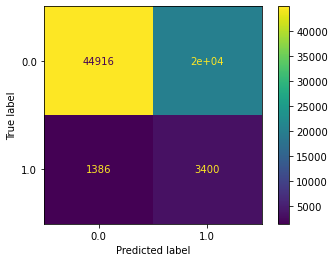

In [72]:
mynb=GaussianNB()
mynb.fit(X_train, y_train)
myf(mynb)

# K Nearest Neighbors

In [73]:
#myknn=KNN(2)
#myknn.fit(X_train, y_train)
#myf(myknn)
##Not Run.  

# Logistic Regression Models

## Elasticnet Regularization

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.976024,0.171307,0.732659,0.573666,0.920875
recall,0.730945,0.755955,0.732659,0.743450,0.732659
f1-score,0.835891,0.279318,0.732659,0.557604,0.797748
support,65050.000000,4786.000000,0.732659,69836.000000,69836.000000


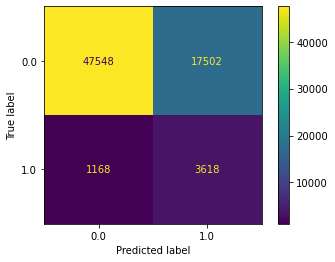

In [74]:
##############################################################################################################################
mylm=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.9) #logistic model with elasticnet
myfit2=mylm.fit(X_train, y_train)  #Fit on training data 
myf(mylm)
##############################################################################################################################

In [75]:
pr1=mylm.predict_proba(X_test)
cut=.5
pr1[pr1<cut]=0
pr1[pr1>=cut]=1
nw=pd.DataFrame(pr1, columns=('No','Yes'))
tmp=nw[['No','Yes']].idxmax(axis=1)
tmp[tmp=='Yes']=1
tmp[tmp=='No']=0
tmp=tmp.astype('float64')
ndf=pd.DataFrame({'Pred':tmp, 'Actual': y_test})
pd.crosstab(ndf.Actual,ndf.Pred)

Pred,0.0,1.0
Actual,,
0.0,47548,17502
1.0,1168,3618


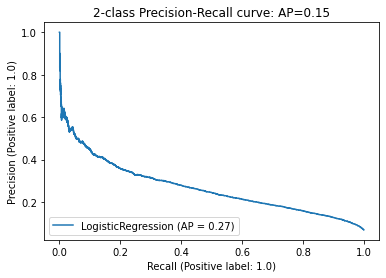

In [76]:
prplot(mylm)

## L2 Regularized Logistic Regression

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.976004,0.171259,0.732631,0.573632,0.920853
recall,0.730930,0.755746,0.732631,0.743338,0.732631
f1-score,0.835874,0.279240,0.732631,0.557557,0.797726
support,65050.000000,4786.000000,0.732631,69836.000000,69836.000000


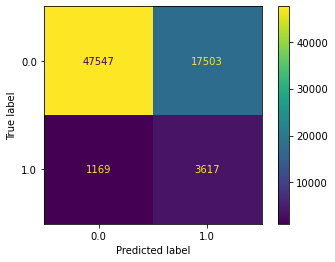

In [77]:
##############################################################################################################################
myrr=LR(fit_intercept = True, solver='liblinear', penalty='l2') #logistic model
myrr.fit(X_train, y_train)  #Fit on training data 
myf(myrr) #predict on test set and plot
##############################################################################################################################

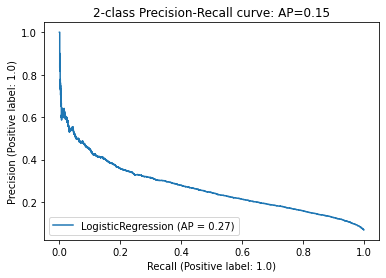

In [78]:
prplot(myrr)

## L1 Regularized Logistic Regression

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.976003,0.171243,0.732602,0.573623,0.920851
recall,0.730899,0.755746,0.732602,0.743323,0.732602
f1-score,0.835853,0.279219,0.732602,0.557536,0.797706
support,65050.000000,4786.000000,0.732602,69836.000000,69836.000000


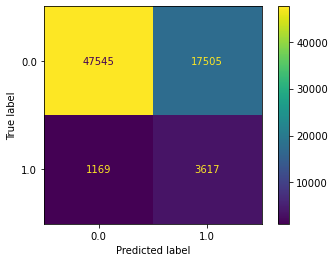

In [79]:
##############################################################################################################################
mylasso=LR(fit_intercept = True, solver='liblinear', penalty='l1') #logistic model
mylasso.fit(X_train, y_train)  #Fit on training data 
myf(mylasso) #predict on test set and plot
##############################################################################################################################

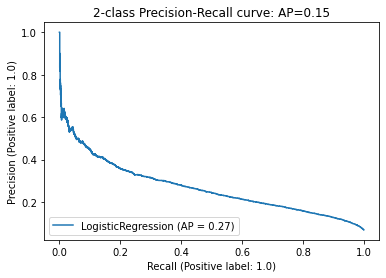

In [80]:
prplot(mylasso)

## SGD Classifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.976360,0.170709,0.73044,0.573534,0.921147
recall,0.728240,0.760343,0.73044,0.744291,0.730440
f1-score,0.834242,0.278819,0.73044,0.556530,0.796177
support,65050.000000,4786.000000,0.73044,69836.000000,69836.000000


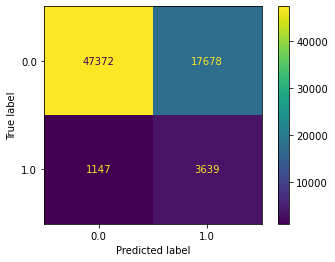

In [81]:
mysgd=SGD(loss='log', penalty='l1', alpha=0.001,fit_intercept=True, random_state=43)
mysgd.fit(X_train,y_train)
myf(mysgd)

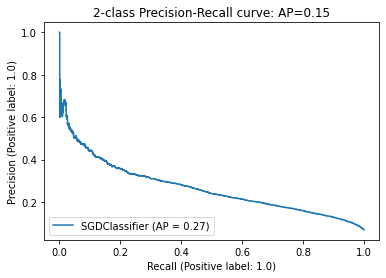

In [82]:
prplot(mysgd)

## Comparison of Coefficients

In [83]:
def flat(x):
    return(np.reshape(x,57))
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
p1, p2, p3, p4, p5=mydata.columns.values[1:57],flat(np.exp(mylm.coef_)),flat(np.exp(myrr.coef_)),flat(np.exp(mylasso.coef_)), flat(np.exp(mysgd.coef_))
pd.DataFrame(list(zip(p1, p2, p3, p4, p5)), columns=['Name','Elasticnet', 'L2', 'L1', 'SGD'])
#print(mylm.intercept_)

,Name,Elasticnet,L2,L1,SGD
0,Male,2.545616,2.545316,2.544438,2.429521
1,Veteran,1.042972,1.043076,1.043188,1.000000
2,RentHome,1.080755,1.081174,1.081023,1.000000
3,PoorHealth,3.948543,3.949399,3.948135,3.354350
4,Smoker,1.487040,1.486973,1.486838,1.461202
5,ChewSnuff,0.646709,0.646401,0.646699,0.847072
6,NoExercise,0.941375,0.941252,0.941238,1.000000
7,PercentDrink,0.255123,0.256154,0.254603,0.596688
8,HighCholesterol,1.664877,1.664752,1.664670,1.641564
9,HighBP,1.938930,1.938789,1.938577,1.955664


# Tree Models

## Tree Plots

In [84]:
def mytree(mod):
    imp, std=mod.feature_importances_, np.std([mod.feature_importances_ for tree in mod.estimators_], axis=0)
    importances = pd.Series(imp, index=mydata.columns[1:58]).sort_values(ascending=False)[0:20]
    fig, ax = plt.subplots()
    importances.plot.bar(yerr=std[0:20], ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

## Decision Tree Classifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.954956,0.193797,0.83477,0.574376,0.902792
recall,0.863336,0.446511,0.83477,0.654923,0.834770
f1-score,0.906838,0.270284,0.83477,0.588561,0.863213
support,65050.000000,4786.000000,0.83477,69836.000000,69836.000000


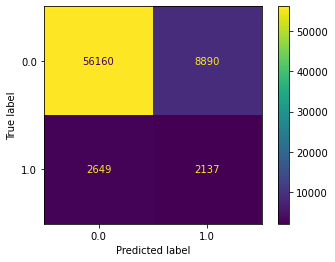

In [85]:
myTree=Tree(criterion='entropy', splitter='best', max_depth=8,min_samples_split=2, min_samples_leaf=1, random_state=123)
myTree.fit(X_train,y_train)
myf(myTree)

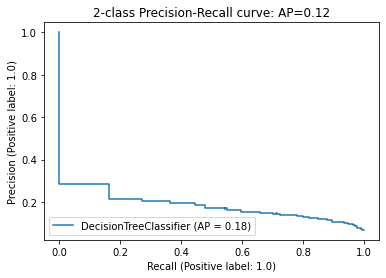

In [86]:
prplot(myTree)

## Random Forest Classifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.948118,0.270285,0.896443,0.609202,0.901665
recall,0.940277,0.300669,0.896443,0.620473,0.896443
f1-score,0.944181,0.284669,0.896443,0.614425,0.898983
support,65050.000000,4786.000000,0.896443,69836.000000,69836.000000


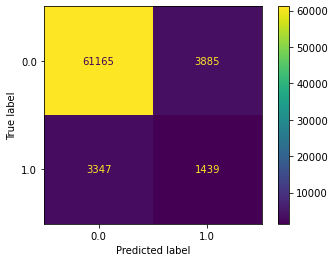

In [87]:
##############################################################################################################################
myrf=RFC(n_estimators = 100,max_depth=17,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 64) #RF Model
myrf.fit(X_train, y_train)  # Fit on the training set 
myf(myrf)
##############################################################################################################################

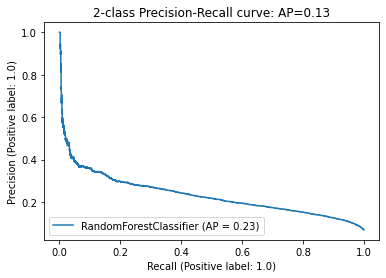

In [88]:
prplot(myrf)

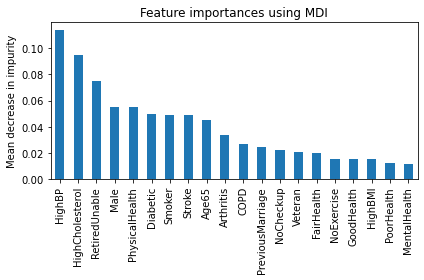

In [89]:
mytree(myrf)

## Extra Trees Classifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.953899,0.245326,0.874119,0.599613,0.905339
recall,0.908778,0.403051,0.874119,0.655914,0.874119
f1-score,0.930792,0.305004,0.874119,0.617898,0.887906
support,65050.000000,4786.000000,0.874119,69836.000000,69836.000000


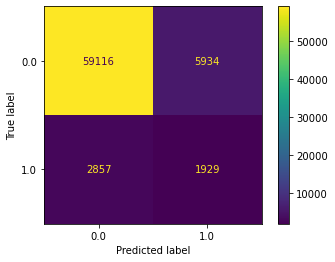

In [90]:
##############################################################################################################################
myextra=ETC(n_estimators = 50, max_depth=22, min_samples_split=2,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 64) #previously tuned
myextra.fit(X_train, y_train)  #Fit on training set
myf(myextra)
#######################################################

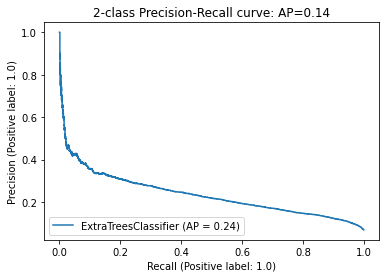

In [91]:
prplot(myextra)

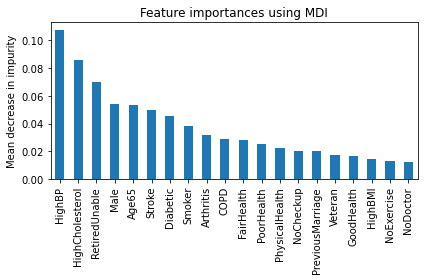

In [92]:
mytree(myextra)

##  Gradient Boosting

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.957152,0.234828,0.860516,0.595990,0.907650
recall,0.890100,0.458420,0.860516,0.674260,0.860516
f1-score,0.922409,0.310567,0.860516,0.616488,0.880478
support,65050.000000,4786.000000,0.860516,69836.000000,69836.000000


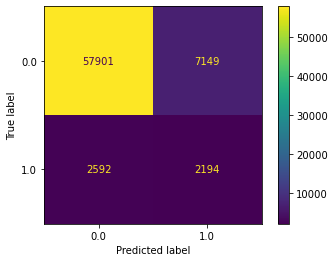

In [93]:
##############################################################################################################################
myGBC=GBC(n_estimators = 50, random_state = 64)
myGBC.fit(X_train, y_train)  #Fit on training set
myf(myGBC)
##############################################################################################################################

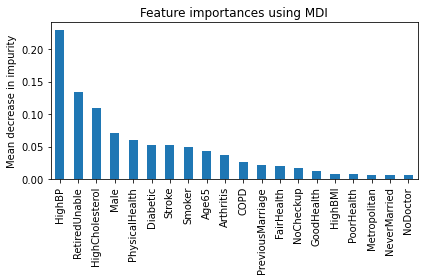

In [94]:
mytree(myGBC)

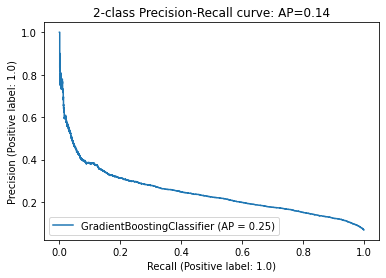

In [95]:
prplot(myGBC)

## ADA Boost Classifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.957312,0.216549,0.847199,0.586931,0.906546
recall,0.874973,0.469703,0.847199,0.672338,0.847199
f1-score,0.914293,0.296433,0.847199,0.605363,0.871949
support,65050.000000,4786.000000,0.847199,69836.000000,69836.000000


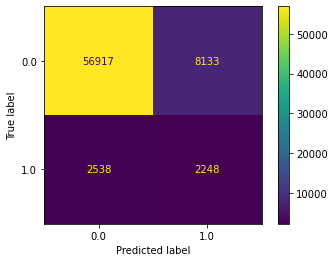

In [96]:
myADA=ABC(n_estimators=50, random_state=0)
myADA.fit(X_train,y_train)
myf(myADA)

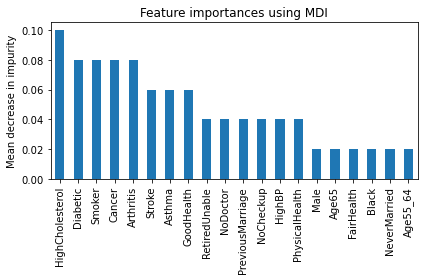

In [97]:
mytree(myADA)

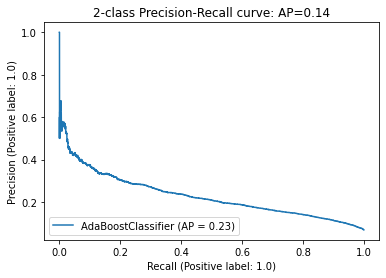

In [98]:
prplot(myADA)

# Discriminant Analysis

##  LDA

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.976151,0.168209,0.726073,0.572180,0.920781
recall,0.723597,0.759716,0.726073,0.741657,0.726073
f1-score,0.831112,0.275434,0.726073,0.553273,0.793030
support,65050.000000,4786.000000,0.726073,69836.000000,69836.000000


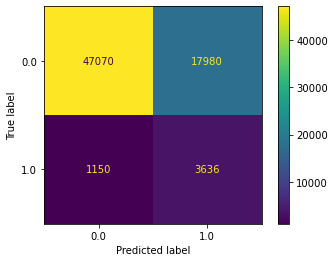

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
mylda=LDA()
mylda.fit(X_train, y_train)  # Fit on the training set 
myf(mylda)

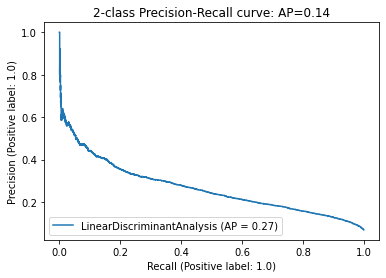

In [100]:
prplot(mylda)

# QDA

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.968964,0.133854,0.664414,0.551409,0.911732
recall,0.660892,0.712286,0.664414,0.686589,0.664414
f1-score,0.785812,0.225359,0.664414,0.505585,0.747403
support,65050.000000,4786.000000,0.664414,69836.000000,69836.000000


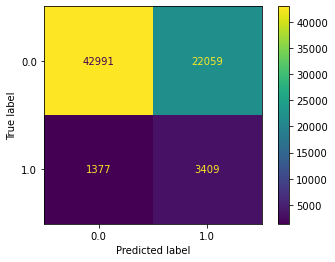

In [101]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
myqda=QDA()
myqda.fit(X_train, y_train)  #Fit on training set
myf(myqda)

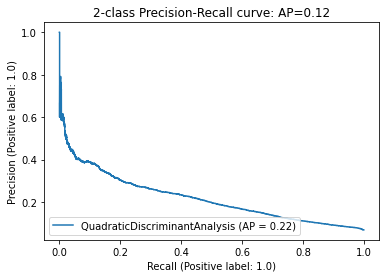

In [102]:
prplot(myqda)

# Linear Support Vector Machine

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.976179,0.169497,0.728593,0.572838,0.920895
recall,0.726349,0.759089,0.728593,0.742719,0.728593
f1-score,0.832934,0.277117,0.728593,0.555025,0.794843
support,65050.000000,4786.000000,0.728593,69836.000000,69836.000000


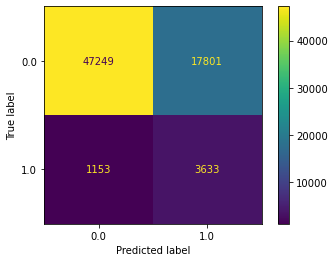

In [103]:
mysvm=LinearSVC(random_state=0, tol=1e-5)
mysvm.fit(X_train, y_train)  #Fit on training set
myf(mysvm)

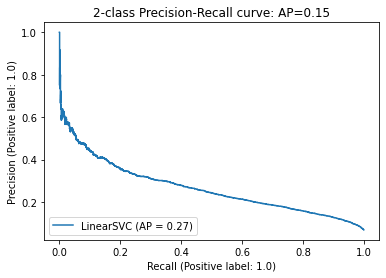

In [104]:
prplot(mysvm)